In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


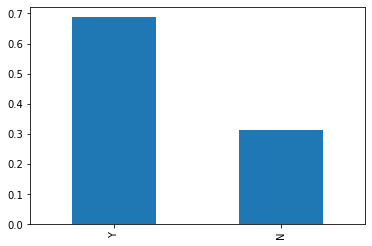

In [4]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

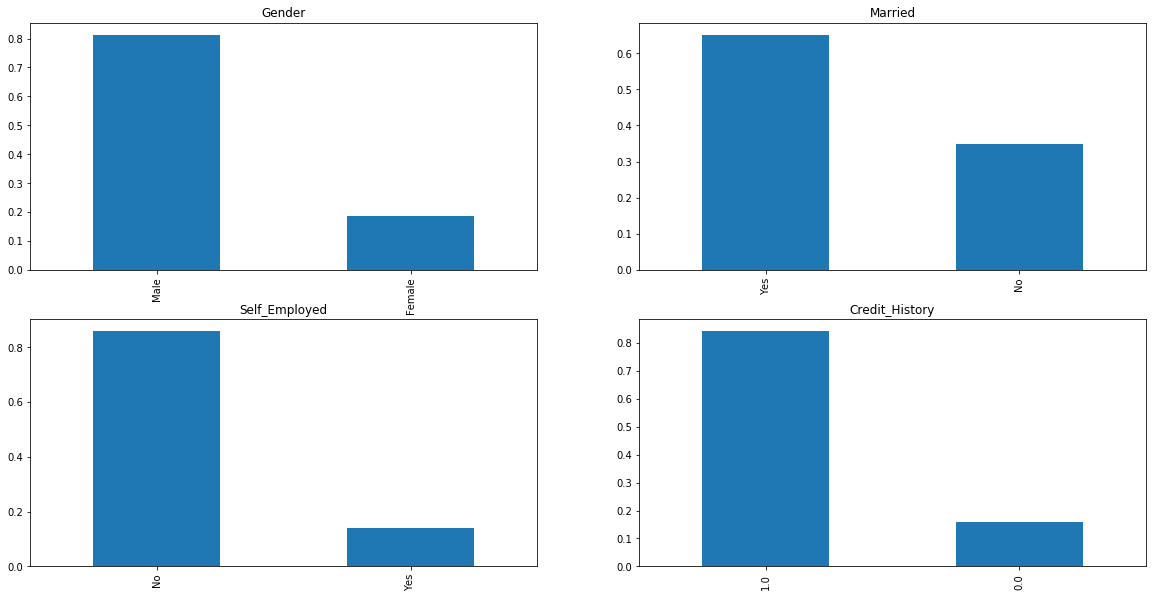

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

<function matplotlib.pyplot.show(*args, **kw)>

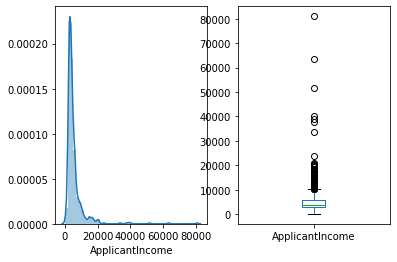

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box()
plt.show

In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [29]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [32]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [33]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [35]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [39]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [40]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='l2',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)



E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
pred_cv=model.predict(x_cv)

In [45]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [46]:
pred_test=model.predict(test)

In [54]:
submission=pd.read_csv('sample_submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [52]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [53]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('solution.csv')

In [ ]:
df=pd.read_csv('')